In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the dataset
# We specify na_values='?' because this dataset uses '?' for missing entries
df = pd.read_csv('breast_cancer_bd.csv', na_values='?')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check data info to see columns and types
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
print("\nStatistical Summary:")

In [2]:
# 1. Drop 'Sample code number' as it is an ID and not a feature
df = df.drop(['Sample code number'], axis=1)

# 2. Handle Missing Values
# Check for null values
print(f"\nMissing values before cleaning:\n{df.isnull().sum()}")

# Drop rows with missing values (or you could fill them with the median)
df = df.dropna()

# 3. separate Features (X) and Target (y)
# The 'Class' column is our ground truth (2 for Benign, 4 for Malignant)
X = df.drop('Class', axis=1)
y = df['Class']

# 4. Scale the Data
# K-Means is sensitive to the scale of data, so standardization is required
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData preprocessing complete.")
print(f"Shape of features matrix: {X_scaled.shape}")


Missing values before cleaning:
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Data preprocessing complete.
Shape of features matrix: (683, 9)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

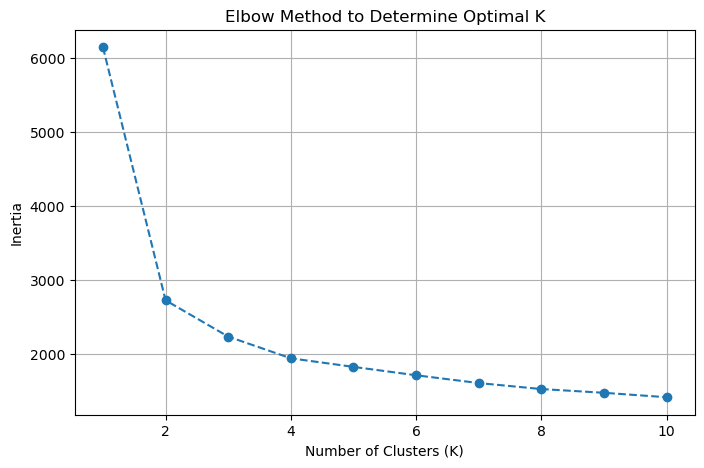

In [3]:
# Calculate Inertia for a range of clusters (1 to 10)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [4]:
# We choose K=2 based on the problem (Benign vs Malignant)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get the cluster labels (these will be 0 and 1)
cluster_labels = kmeans.labels_

# Add predictions to the dataframe for comparison
df['Cluster'] = cluster_labels

print("Clustering complete.")
display(df.head())

Clustering complete.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Cluster
0,5,1,1,1,2,1.0,3,1,1,2,1
1,5,4,4,5,7,10.0,3,2,1,2,0
2,3,1,1,1,2,2.0,3,1,1,2,1
3,6,8,8,1,3,4.0,3,7,1,2,0
4,4,1,1,3,2,1.0,3,1,1,2,1


Confusion Matrix (Cluster vs Actual Class):

Class      2    4
Cluster          
0         10  218
1        434   21

Mapping Clusters to Classes: {0: np.int64(4), 1: np.int64(2)}

Model Accuracy: 95.46%

Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.98      0.97       444
           4       0.96      0.91      0.93       239

    accuracy                           0.95       683
   macro avg       0.95      0.94      0.95       683
weighted avg       0.95      0.95      0.95       683



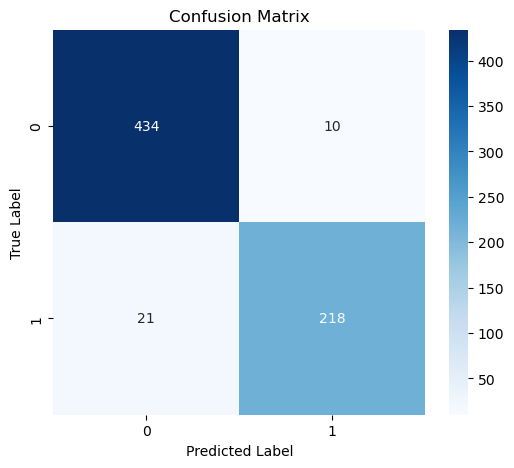

In [5]:
# Create a mapping dictionary to correct labels if they are swapped
# We check the cross-tabulation between Cluster and Actual Class
ct = pd.crosstab(df['Cluster'], df['Class'])
print("Confusion Matrix (Cluster vs Actual Class):\n")
print(ct)

# Identify which cluster corresponds to which class based on majority count
# usually, the cluster with more '2's is Benign, and the one with more '4's is Malignant
map_labels = {}
for cluster in ct.index:
    # Find the class (column) with the maximum count for this cluster row
    predicted_class = ct.loc[cluster].idxmax()
    map_labels[cluster] = predicted_class

print(f"\nMapping Clusters to Classes: {map_labels}")

# Apply the mapping to get final predictions
df['Predicted_Class'] = df['Cluster'].map(map_labels)

# Calculate Accuracy
accuracy = accuracy_score(df['Class'], df['Predicted_Class'])
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(df['Class'], df['Predicted_Class']))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(df['Class'], df['Predicted_Class']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()